<a href="https://colab.research.google.com/github/omnanda04/Om_MetaSciforTechnology/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
# Drop CustomerID column
df = df.drop(columns=["CustomerID"])

In [4]:
# Encode 'Genre' column
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])  # 0: Female, 1: Male

In [5]:
# Create a binary target variable: HighSpender
df['HighSpender'] = df['Spending_Score'].apply(lambda x: 1 if x >= 50 else 0)

# Feature set and target variable
X = df[["Genre", "Age", "Annual_Income_(k$)"]]
y = df["HighSpender"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),  # You can try 'rbf' or 'poly' kernels too
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.71      0.60      0.65        20
High Spender       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



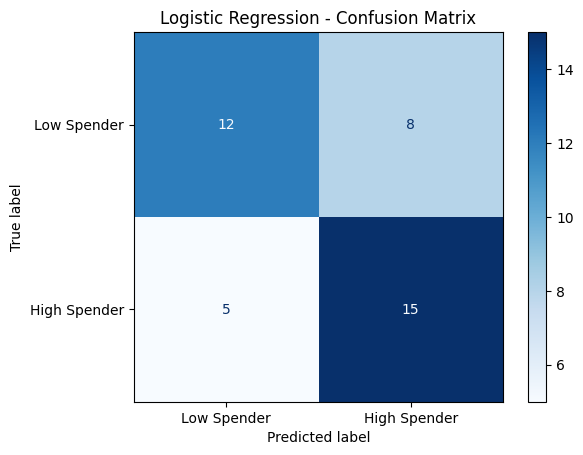


SVM Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.71      0.60      0.65        20
High Spender       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



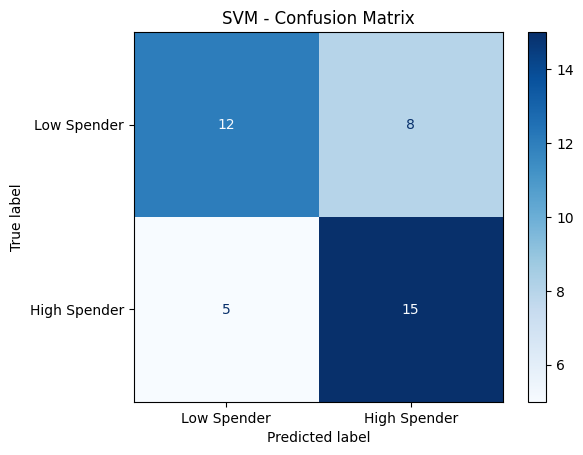


Decision Tree Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.68      0.75      0.71        20
High Spender       0.72      0.65      0.68        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



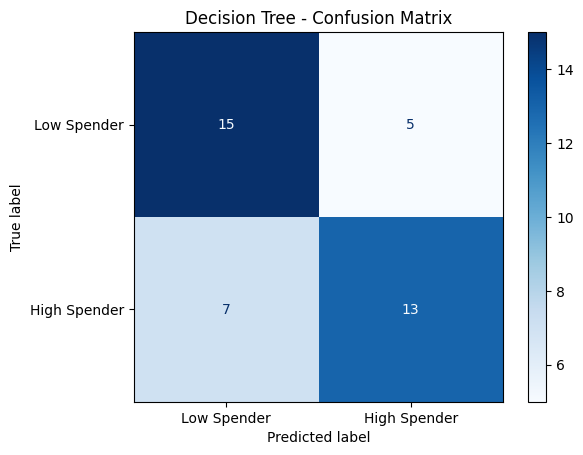


Random Forest Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.67      0.60      0.63        20
High Spender       0.64      0.70      0.67        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



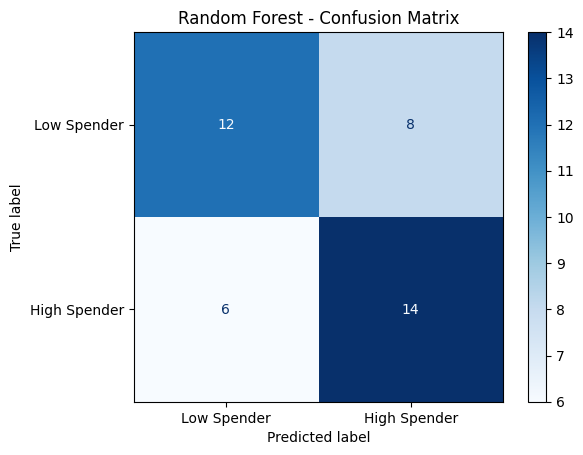

In [7]:
# Train and evaluate each model
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Low Spender", "High Spender"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Spender", "High Spender"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

<ipython-input-8-0287c70462da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="mako")


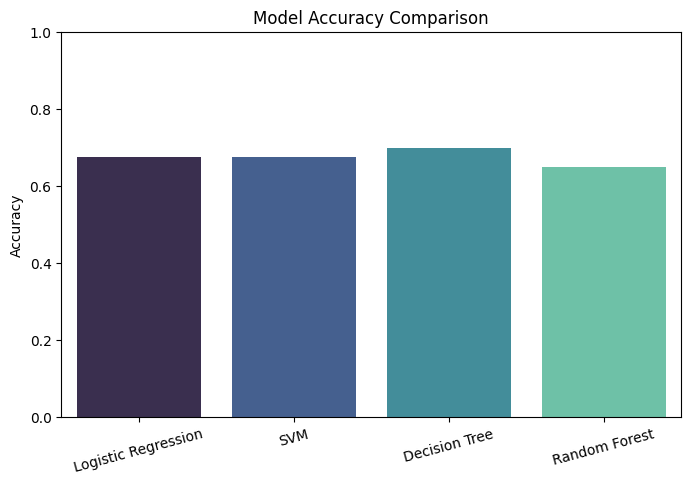

In [8]:
# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="mako")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.show()